**Import Tensorflow as Neural Network package**

In [1]:
import pandas as pd 
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 

In [2]:
Data = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50Combined/50MostImp+CombinedFeatures.csv")
Target = pd.read_csv("../../../4 - Data/04_WorkingDatasets/Top50Combined/TargetCutto50MostImpFeatures_DF.csv")

In [3]:
Target.head()

Data.drop(columns = ['Datum'], inplace = True)
Data.head()


,pm10_stundenmittelwerte_ug_m3,pm2_5_stundenmittelwerte_ug_m3,PM10 [ug/m3],PM2.5 [ug/m3],NO2 [ug/m3],NOX [ug/m3 eq. NO2],no2_stundenmittelwerte_ug_m3,CPC [1/cm3],Basel Wind Direction [10 m],Basel Wind Speed [10 m],...,Basel Wind Speed [10 m]_x_Basel Wind Speed [10 m],Basel Wind Speed [10 m]_x_Basel Wind Direction [10 m],Basel Wind Speed [10 m]_x_Gasverbrauch,Basel Wind Speed [10 m]_x_Hour,Basel Wind Direction [10 m]_x_Basel Wind Direction [10 m],Basel Wind Direction [10 m]_x_Hour,406v_sumLW_x_408n_sumLief,660n_sumPW_x_Gasverbrauch,Gasverbrauch_x_Gasverbrauch,Gasverbrauch_x_Hour
0,6.865272,6.410187,2.472288,3.669492,0.377778,0.660925,-0.281190,5.129292,0.103735,-0.706183,...,-0.235434,-0.283734,-0.377593,-0.046808,-0.890521,-0.020069,-0.122035,-0.459651,-0.612347,0.040175
1,5.604765,5.365617,5.336546,6.904393,0.513680,1.023867,-0.341945,6.717360,0.035445,-0.928795,...,-0.075257,-0.241799,-0.515062,-0.115922,-0.900547,-0.016733,0.086553,-0.576248,-0.585116,0.067887
2,4.783963,4.649061,8.200804,10.581065,0.368718,1.073928,-0.381885,6.019105,-0.154365,-0.868809,...,-0.122800,-0.053188,-0.517671,-0.175949,-0.884203,-0.040232,-0.007376,-0.590613,-0.571382,0.099923
3,3.145631,3.244991,5.381831,7.189407,0.341537,0.998837,-0.383284,4.549830,-0.018084,-0.842411,...,-0.142698,-0.186471,-0.720133,-0.234521,-0.902521,-0.021412,0.156083,-0.692110,-0.417436,0.183681
4,2.665566,2.809222,3.819508,5.108809,0.731123,0.817366,-0.392904,2.870089,-0.159550,-0.699905,...,-0.239306,-0.076720,-0.998149,-0.253919,-0.882844,-0.061861,0.258004,-0.788389,0.146464,0.384286


In [4]:
# Beispiel: Annahme, X.shape[0] = 1000 (1000 Zeitpunkte)
n = Data.shape[0]
X = Data.copy()
y = Target["PM10_Combined_Trend_Residual"].copy()

# Split-Größen definieren
train_size = int(n * 0.7)  # 70% Training
val_size = int(n * 0.2)    # 20% Validierung
test_size = n - train_size - val_size  # 10% Test

# Training (älteste Daten)
X_train, y_train = X[:train_size], y[:train_size]

# Validierung (neuere Daten)
X_val, y_val = X[train_size:train_size + val_size], y[train_size:train_size + val_size]

# Test (neueste Daten)
X_test, y_test = X[train_size + val_size:], y[train_size + val_size:]


In [5]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='linear'),
])


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [7]:
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])


Epoch 1/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 43.4172 - mae: 4.3688 - mse: 40.8285 - val_loss: 49.8593 - val_mae: 3.8877 - val_mse: 47.5619
Epoch 2/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 27.3178 - mae: 3.2083 - mse: 25.0995 - val_loss: 46.6386 - val_mae: 3.6678 - val_mse: 44.7236
Epoch 3/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.5523 - mae: 3.0741 - mse: 23.7028 - val_loss: 46.2423 - val_mae: 3.6791 - val_mse: 44.5685
Epoch 4/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.6092 - mae: 3.0126 - mse: 19.9934 - val_loss: 44.7547 - val_mae: 3.5910 - val_mse: 43.2728
Epoch 5/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.4415 - mae: 2.9524 - mse: 19.0087 - val_loss: 44.6433 - val_mae: 3.5505 - val_mse: 43.3012
Epoch 6/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 29.4928 - mae: 3.0198 - mse: 28.1694 - val_loss: 44.3118 - val_mae: 3.5834 - val_mse: 43.0792
Epoch 7/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - l

In [9]:
print(X_test.shape)  # Zeigt die Anzahl der Zeilen (Samples) in X_test
print(y_test.shape)  # Zeigt die Anzahl der Zeilen (Samples) in y_test


(2459, 66)
(2459,)


In [10]:
results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.6700 - mae: 2.3132 - mse: 9.5801  
Test loss, Test MAE: [11.905677795410156, 2.52268123626709, 10.81578254699707]


In [11]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='linear'),
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 5 Epochs lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

history2 = model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE, Test MSE:", results)

Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 55.9583 - mae: 4.8736 - mse: 53.2440 - val_loss: 49.2300 - val_mae: 3.7800 - val_mse: 46.8199
Epoch 2/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.8902 - mae: 3.4205 - mse: 23.5701 - val_loss: 47.0587 - val_mae: 3.6725 - val_mse: 45.0045
Epoch 3/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 25.1347 - mae: 3.3403 - mse: 23.1507 - val_loss: 45.9950 - val_mae: 3.6192 - val_mse: 44.2359
Epoch 4/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.4481 - mae: 3.3054 - mse: 20.7404 - val_loss: 44.3662 - val_mae: 3.5890 - val_mse: 42.8163
Epoch 5/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.3383 - mae: 3.2540 - mse: 20.8285 - val_loss: 47.3699 - val_mae: 3.7850 - val_mse: 45.9764
Epoch 6/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 22.4104 - mae: 3.1819 - mse: 21.0311 - val_loss: 44.6193 - val_mae: 3.5673 - val_mse: 43.3164
Epoch 7/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 21.7760

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 16.7312 - mae: 2.0032 - mse: 16.0741
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594] Validation loss, Validation MAE: [11.597309112548828, 1.8775585889816284, 10.940282821655273]


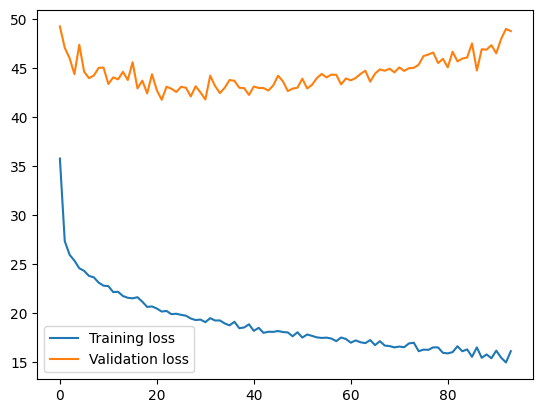

In [12]:
import matplotlib.pyplot as plt
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


In [ ]:
model3 = Sequential([
    Dense(512, activation='relu', input_shape=(Data.shape[1],), kernel_regularizer=l2(0.025)),
    Dropout(0.15),
    Dense(256, activation='relu'),
    Dropout(0.38),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='relu'),
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
# Early Stopping Callback
early_stopping = EarlyStopping(
    patience=72,  # Training stoppt, wenn sich der Validierungs-Loss 15 Epochen lang nicht verbessert
    restore_best_weights=True  # Die besten Gewichte werden zurückgeladen
)

#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.25, patience=15, min_lr=1e-6)



history3 = model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=800, batch_size=16, callbacks=[early_stopping])

results = model.evaluate(X_test, y_test)
print("Test loss, Test MAE:", results)



Epoch 1/800


C:\Users\maxd2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 34.3799 - mae: 4.0243 - mse: 33.1679 - val_loss: 44.5860 - val_mae: 3.6054 - val_mse: 43.3945
Epoch 2/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 24.8733 - mae: 3.1839 - mse: 23.6959 - val_loss: 44.2676 - val_mae: 3.6057 - val_mse: 43.1320
Epoch 3/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.9876 - mae: 3.0102 - mse: 19.8681 - val_loss: 44.4664 - val_mae: 3.6271 - val_mse: 43.3758
Epoch 4/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 25.0826 - mae: 3.0543 - mse: 23.9959 - val_loss: 44.7709 - val_mae: 3.6155 - val_mse: 43.7182
Epoch 5/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 19.3184 - mae: 2.9476 - mse: 18.2722 - val_loss: 45.4608 - val_mae: 3.6916 - val_mse: 44.4092
Epoch 6/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20.7722 - mae: 2.9058 - mse: 19.7194 - val_loss: 44.2012 - val_mae: 3.6157 - val_mse: 43.1654
Epoch 7/800
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 22.1848

825/825 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 21.2917 - mae: 2.8006 - mse: 19.2867 - val_loss: 14.9597 - val_mae: 3.0737 - val_mse: 14.1035 - learning_rate: 0.0010
Epoch 2/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5636 - mae: 2.0404 - mse: 7.8410 - val_loss: 8.2422 - val_mae: 2.1522 - val_mse: 7.8084 - learning_rate: 0.0010
Epoch 3/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.0740 - mae: 2.0293 - mse: 8.6728 - val_loss: 10.2058 - val_mae: 2.4821 - val_mse: 9.9091 - learning_rate: 0.0010
Epoch 4/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.0456 - mae: 1.8458 - mse: 6.7611 - val_loss: 11.5418 - val_mae: 2.6741 - val_mse: 11.2898 - learning_rate: 0.0010
Epoch 5/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2041 - mae: 1.7523 - mse: 5.9584 - val_loss: 14.2653 - val_mae: 3.0815 - val_mse: 14.0384 - learning_rate: 0.0010
Epoch 6/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5206 - mae: 1.6532 - mse: 5.2965 - val_loss: 15.4869 - val_mae: 3.1436 - val_mse: 15.2706 - learning_rate: 0.0010
Epoch 7/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.2349 - mae: 1.7570 - mse: 6.0151 - val_loss: 13.7594 - val_mae: 2.9506 - val_mse: 13.5450 - learning_rate: 0.0010
Epoch 8/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7316 - mae: 1.6844 - mse: 5.5207 - val_loss: 19.9287 - val_mae: 3.6997 - val_mse: 19.7239 - learning_rate: 0.0010
Epoch 9/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5522 - mae: 1.6580 - mse: 5.3458 - val_loss: 26.9765 - val_mae: 4.3214 - val_mse: 26.7674 - learning_rate: 0.0010
Epoch 10/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5004 - mae: 1.6547 - mse: 5.2929 - val_loss: 16.9995 - val_mae: 3.3162 - val_mse: 16.7938 - learning_rate: 0.0010
Epoch 11/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.6889 - mae: 1.6493 - mse: 5.4781 - val_loss: 17.6912 - val_mae: 3.4159 - val_mse: 17.4742 - learning_rate: 0.0010
Epoch 12/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.4277 - mae: 1.6239 - mse: 5.2176 - val_loss: 18.3354 - val_mae: 3.4977 - val_mse: 18.1326 - learning_rate: 0.0010
Epoch 13/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.9380 - mae: 1.5132 - mse: 4.7404 - val_loss: 19.3301 - val_mae: 3.6291 - val_mse: 19.1460 - learning_rate: 2.5000e-04
...
Epoch 17/800
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.5297 - mae: 1.4443 - mse: 4.3617 - val_loss: 18.6069 - val_mae: 3.5405 - val_mse: 18.4405 - learning_rate: 2.5000e-04
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6273 - mae: 1.4624 - mse: 3.9703  
Test loss, Test MAE: [4.761786937713623, 1.4637393951416016, 4.104759216308594]

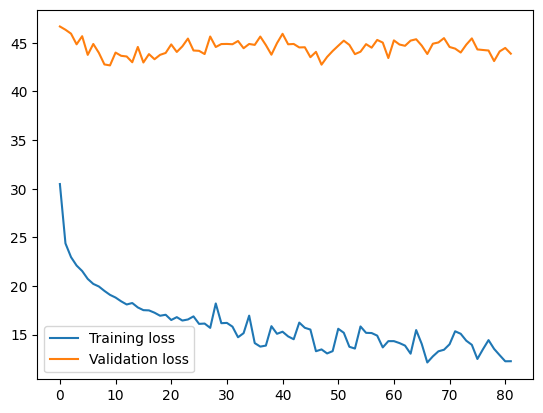

In [14]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()


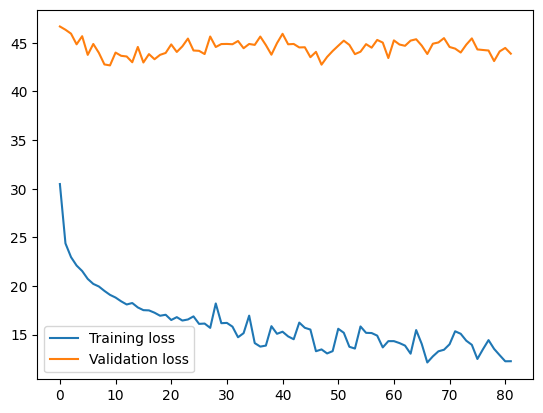

In [15]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()